In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

# Kyphosis - whether it was present or not after the operation
# Age - its in months
# Number -  Number of vertebrate involve
# Start - the start or the topmost vertebrate operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Kyphosis is an exaggerated, forward rounding of the back. It can occur at any age but is most common in older women.

Age-related kyphosis is often due to weakness in the spinal bones that causes them to compress or crack. Other types of kyphosis can appear in infants or teens due to malformation of the spine or wedging of the spinal bones over time.

Mild kyphosis causes few problems. Severe kyphosis can cause pain and be disfiguring. Treatment for kyphosis depends on your age, and the cause and effects of the curvature.

In [5]:
#EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


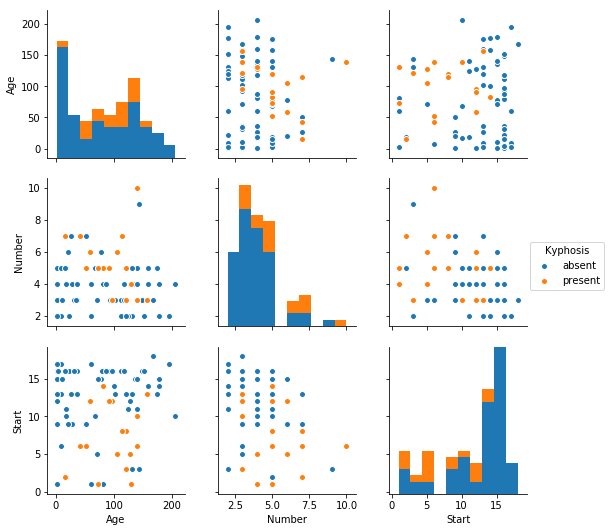

In [6]:
sns.pairplot(data=df, hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)

In [9]:
y = df['Kyphosis']

In [18]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test, predictions))

[[15  4]
 [ 4  2]]


In [25]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.79      0.79      0.79        19
    present       0.33      0.33      0.33         6

avg / total       0.68      0.68      0.68        25



In [26]:
print(classification_report(y_test, predictions), '\n', confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.79      0.79      0.79        19
    present       0.33      0.33      0.33         6

avg / total       0.68      0.68      0.68        25
 
 [[15  4]
 [ 4  2]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(classification_report(y_test, ref_pred), '\n', confusion_matrix(y_test, rfc_pred))

             precision    recall  f1-score   support

     absent       0.77      0.89      0.83        19
    present       0.33      0.17      0.22         6

avg / total       0.67      0.72      0.68        25
 
 [[17  2]
 [ 5  1]]


In [34]:
 df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [35]:
from IPython.display import Image

In [36]:
from sklearn.externals.six import StringIO

In [37]:
from sklearn.tree import export_graphviz

In [39]:
import pydot

*pydot*: 
It is an interface to Graphviz; can parse and dump into the DOT language used by GraphViz, is written in pure Python, and networkx can convert its graphs to pydot.

*Graphviz*: 
This package facilitates the creation and rendering of graph descriptions in the DOT language of the Graphviz graph drawing software from Python.

In [40]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [41]:
dot_data = StringIO()

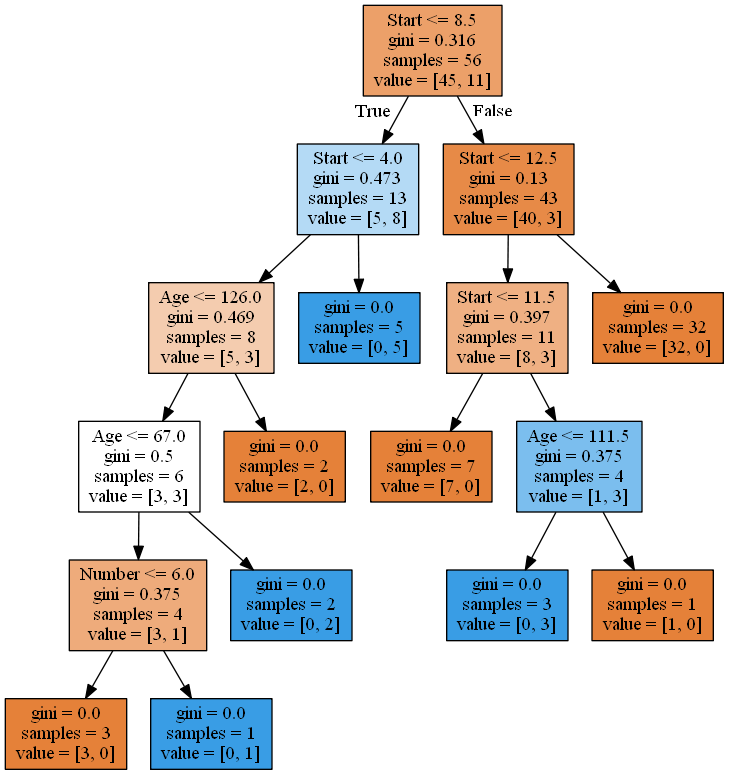

In [43]:
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())